### Import and manipulating data




In [40]:
import sklearn.datasets as skdat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import scipy.interpolate as interp
%matplotlib inline


#importing datasets
greenhouse= pd.read_excel('greenhouse.xlsx')
cereal = pd.read_excel('cereal.xlsx')
fertilizer = pd.read_excel('fertilizer.xlsx')


def manipulate(x):
    """ Manipulating the dataset by removing unnecessary columns for plotting and inspection purposes"""
    
    x = x.transpose() 
    x = x.rename(columns=x.iloc[0]) 
    x = x.rename(columns={"Country Name":"Year"}) 
    x = x.dropna(axis=1,how='all') 
    x = x.reset_index(drop = True)
    x = x.drop([0, 1, 2, 3])
    x=x.set_index("Year")
    x=x.transpose()
    x=x.fillna(0)
    return x

def norm(array):
    """ Returns array normalised to [0,1] (taken from practical 10) """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled

def norm_df(df):
    
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine.(taken from practical 10)
    
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

#apply the function defined from above

greenhouse=manipulate(greenhouse)
fertilizer=manipulate(fertilizer)
cereal=manipulate(cereal)

#normalize dataset

greenhouse=norm_df(greenhouse)
fertilizer=norm_df(fertilizer)
cereal=norm_df(cereal)

#### Extract the years that i want from each 3 of the datasets

In [41]:

g70=greenhouse.iloc[:, 10]  #1970
g00=greenhouse.iloc[:,50]   #2010

f70=fertilizer.iloc[:, 10]  #same principle as above
f00=fertilizer.iloc[:,50]

c70=cereal.iloc[:, 10]
c00=cereal.iloc[:,50]



#####  plot different attributes to check for expected clusters for year 2010


Text(0, 0.5, 'fertilizer')

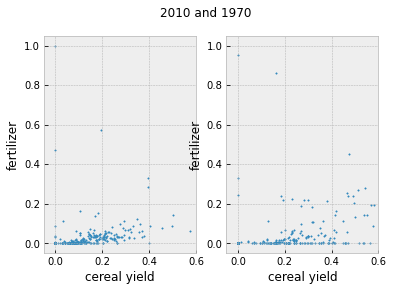

In [42]:
""" subplot of  my exploratory plots"""


plt.subplot(1,2,1)
plt.suptitle("2010 and 1970")
plt.scatter(c00,f00,s=2)
plt.xlim(right=0.6)     
plt.xlabel("cereal yield")
plt.ylabel("fertilizer")

plt.subplot(1,2,2)

plt.scatter(c70,f70,s=2)
plt.xlim(right=0.6)     
plt.xlabel("cereal yield")
plt.ylabel("fertilizer")




(-0.05, 0.4)

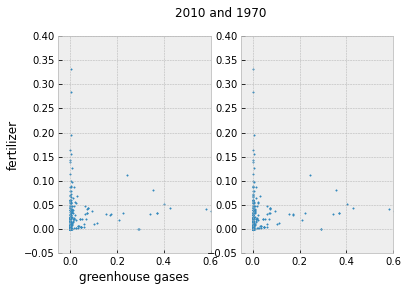

In [43]:
plt.subplot(1,2,1)

plt.suptitle("2010 and 1970")   #same principle as the cell above
plt.scatter(g00,f00,s=2)
plt.xlim(right=0.6) 
plt.ylim(top=0.4)
plt.xlabel("greenhouse gases")
plt.ylabel("fertilizer")


plt.subplot(1,2,2)

plt.scatter(g00,f00,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.4)


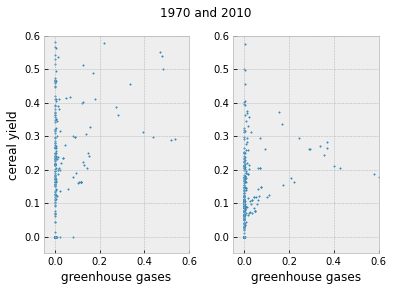

In [44]:
plt.subplot(1,2,1)
plt.suptitle("1970 and 2010") #same principle for cells above
plt.scatter(g70,c70,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.6)
plt.xlabel("greenhouse gases")
plt.ylabel("cereal yield")

plt.subplot(1,2,2)
plt.scatter(g00,c00,s=2)
plt.xlim(right=0.6)
plt.ylim(top=0.6)
plt.xlabel("greenhouse gases")


plt.subplots_adjust(wspace=0.3)



#### picking  greenhouse  v cereal yield for clustering using various methods


C:\Users\keith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Year 2010 (Kmeans)')

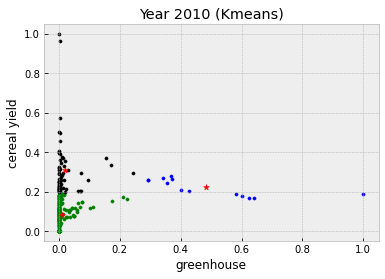

In [45]:
#kmeans method for year 2010

fvcs=pd.concat([g00,c00],axis=1)  #concatinating my data so that i can plot it easier in a scatter plot



kmeans = cluster.KMeans(n_clusters=3) # expected clusters at 3

predict=kmeans.fit_predict(fvcs) #this function gives me value 0,1,2 to categorize my clusters

fvcs['cluster']=predict #adding new column to my concatinated function

fvc1=fvcs[fvcs.cluster==0]   #separate these into 3 numbers so that i can show the difference
fvc2=fvcs[fvcs.cluster==1]
fvc3=fvcs[fvcs.cluster==2]

plt.scatter(fvc1.iloc[:,0],fvc1.iloc[:,1],color='green',s=10)    #iloc 0 and 1 for first and second colum of fvcs
plt.scatter(fvc2.iloc[:,0],fvc2.iloc[:,1],color='blue',s=10)
plt.scatter(fvc3.iloc[:,0],fvc3.iloc[:,1],color='black',s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*') # show the centre clusters

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 2010 (Kmeans)")

C:\Users\keith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Year 1970 (Kmeans)')

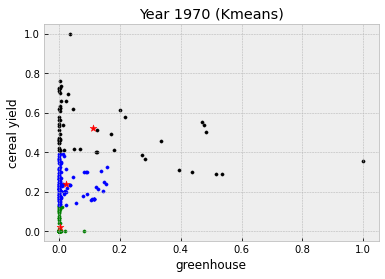

In [46]:
# same principle as the cell above but for year 1970 instead

fvc=pd.concat([g70,c70],axis=1) #year 1970 concatinated
fvcg=fvc.iloc[:,0] #greenhouse
fvcc=fvc.iloc[:,1] #cereal


kmeans = cluster.KMeans(n_clusters=3)

predict=kmeans.fit_predict(fvc)

fvc['cluster']=predict

fvc4=fvc[fvc.cluster==0]
fvc5=fvc[fvc.cluster==1]
fvc6=fvc[fvc.cluster==2]

plt.scatter(fvc4.iloc[:,0],fvc4.iloc[:,1],color='green',s=10)
plt.scatter(fvc5.iloc[:,0],fvc5.iloc[:,1],color='blue',s=10)
plt.scatter(fvc6.iloc[:,0],fvc6.iloc[:,1],color='black',s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 1970 (Kmeans)")

#### Agglomerative clustering method


C:\Users\keith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Year 1970 (Agglomerative)')

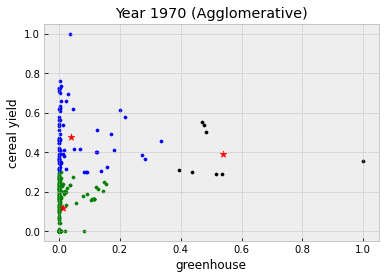

In [47]:
#1970  agglo method

ac = cluster.AgglomerativeClustering(n_clusters=3)

fvc=pd.concat([g70,c70],axis=1)
                   

y_ac=ac.fit_predict(fvc)


labels = ac.labels_

xcen = []
ycen = []
for ic in range(3):
    xc = np.average(fvc.iloc[:,0][labels==ic])
    yc = np.average(fvc.iloc[:,1][labels==ic])
    xcen.append(xc)
    ycen.append(yc)
    

    
fvc['cluster']=y_ac

fvc7=fvc[fvc.cluster==0]
fvc8=fvc[fvc.cluster==1]
fvc9=fvc[fvc.cluster==2]

plt.scatter(fvc7.iloc[:,0],fvc7.iloc[:,1],color='green',s=10)
plt.scatter(fvc8.iloc[:,0],fvc8.iloc[:,1],color='blue',s=10)
plt.scatter(fvc9.iloc[:,0],fvc9.iloc[:,1],color='black',s=10)
plt.scatter(xcen,ycen,color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 1970 (Agglomerative)")

C:\Users\keith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Year 2010 (Agglomerative)')

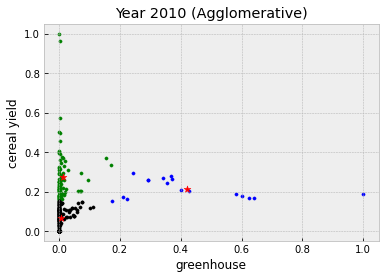

In [48]:
""" Agglomerative clustering using the methods i found on practical 9"""

ac = cluster.AgglomerativeClustering(n_clusters=3) #just like k means give me value 0,1,2 to categorize

fvcs=pd.concat([g00,c00],axis=1) #combine the data for year 2000
                   

y_ac=ac.fit_predict(fvcs) #assigning datapoints by predicting which datapoitns belongs to which clusters


labels = ac.labels_ #values of 0,1,2

# this method does not provide centroids so have to do it manually
xcen = []
ycen = []
for ic in range(3):
    xc = np.average(fvcs.iloc[:,0][labels==ic])
    yc = np.average(fvcs.iloc[:,1][labels==ic])
    xcen.append(xc)
    ycen.append(yc)
    

#same plotting methods i used for k-means
fvcs['cluster']=y_ac 

fvc7=fvcs[fvcs.cluster==0]
fvc8=fvcs[fvcs.cluster==1]
fvc9=fvcs[fvcs.cluster==2]

plt.scatter(fvc7.iloc[:,0],fvc7.iloc[:,1],color='green',s=10)
plt.scatter(fvc8.iloc[:,0],fvc8.iloc[:,1],color='blue',s=10)
plt.scatter(fvc9.iloc[:,0],fvc9.iloc[:,1],color='black',s=10)
plt.scatter(xcen,ycen,color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 2010 (Agglomerative)")

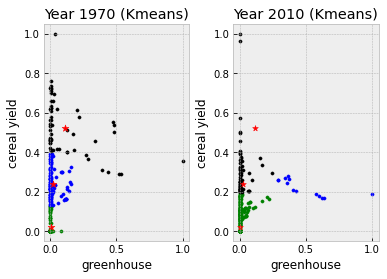

In [49]:
# show plot side to side for both years 1970 and 2010 for k-means for comparison

plt.style.use('bmh')

fig=plt.subplot(1,2,1)

plt.scatter(fvc4.iloc[:,0],fvc4.iloc[:,1],color='green',s=10)
plt.scatter(fvc5.iloc[:,0],fvc5.iloc[:,1],color='blue',s=10)
plt.scatter(fvc6.iloc[:,0],fvc6.iloc[:,1],color='black',s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 1970 (Kmeans)")

fig=plt.subplot(1,2,2)

plt.scatter(fvc1.iloc[:,0],fvc1.iloc[:,1],color='green',s=10)
plt.scatter(fvc2.iloc[:,0],fvc2.iloc[:,1],color='blue',s=10)
plt.scatter(fvc3.iloc[:,0],fvc3.iloc[:,1],color='black',s=10)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='*')

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 2010 (Kmeans)")

plt.subplots_adjust(wspace=0.3)

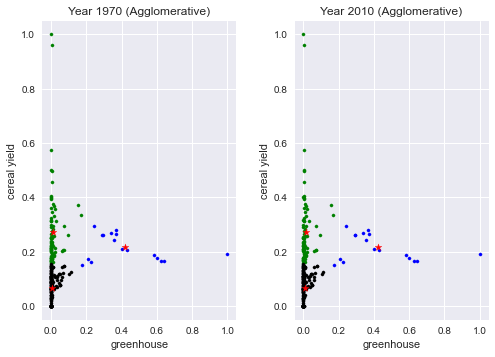

In [52]:
#same principle as cell above

plt.style.use('seaborn')

fig=plt.subplot(1,2,1)
plt.scatter(fvc7.iloc[:,0],fvc7.iloc[:,1],color = 'green',s = 10)
plt.scatter(fvc8.iloc[:,0],fvc8.iloc[:,1],color = 'blue',s=10)
plt.scatter(fvc9.iloc[:,0],fvc9.iloc[:,1],color='black',s=10)
plt.scatter(xcen,ycen,color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 1970 (Agglomerative)")

fig=plt.subplot(1,2,2)
plt.scatter(fvc7.iloc[:,0],fvc7.iloc[:,1],color='green',s=10)
plt.scatter(fvc8.iloc[:,0],fvc8.iloc[:,1],color='blue',s=10)
plt.scatter(fvc9.iloc[:,0],fvc9.iloc[:,1],color='black',s=10)
plt.scatter(xcen,ycen,color='red',marker='*',s=50)

plt.xlabel("greenhouse")
plt.ylabel("cereal yield")
plt.title("Year 2010 (Agglomerative)")

plt.subplots_adjust(wspace=0.3)